# Text Mining Project

Description

## 1. Installs and Imports

In [40]:
#pip install pandas
#!pip install langdetect
#!pip install matplotlib
#!pip install seaborn 
#!pip install re
#!pip install openpyxl
#!pip install googletrans==4.0.0-rc1
#!pip install tqdm
#!pip install wordcloud
#!pip install nltk
#!pip install google-cloud-translate


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from langdetect import detect
from googletrans import Translator
from tqdm import tqdm
from collections import Counter
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
from google.cloud import translate

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Data Exploration and Analysis

**Checking if data was loaded Correctly**

In [4]:
train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")

In [5]:
train.head(5)

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [6]:
train_reviews.head(5)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [7]:
test.head(5)

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [8]:
test_reviews.head(5)

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


**Everything looks fine**

In [9]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)

train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


### 2.1 Index Fix

**In the dataset, the index column has repeating values, which likely indicate that each value corresponds to a specific house. To enhance clarity, we will rename this column to 'house ID'.**

In [10]:
# For train DataFrame
train['houseID'] = train.index  
train.set_index('houseID', inplace=True)  
train.drop(columns=['index'], inplace=True)  

# For train_reviews DataFrame
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews['reviewID'] = train_reviews.index
train_reviews.set_index('reviewID', inplace=True)

# For test DataFrame
test['houseID'] = test.index
test.set_index('houseID', inplace=True)
test.drop(columns=['index'], inplace=True)

# For test_reviews DataFrame
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews['reviewID'] = test_reviews.index
test_reviews.set_index('reviewID', inplace=True)

In [11]:
train.head(5)

,description,host_about,unlisted
houseID,,,
0,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [12]:
train_reviews.head(5)

,houseID,comments
reviewID,,
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [13]:
test.head(5)

,description,host_about
houseID,,
0,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,Charming Apartment Close to the Bay of Cascais...,:)
4,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [14]:
test_reviews.head(5)

,houseID,comments
reviewID,,
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


### 2.2 Duplicates

**Cheacking for Duplicated Rows**

In [15]:
print("Number of duplicated rows in train DataFrame:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame:", test_reviews.duplicated().sum())

Number of duplicated rows in train DataFrame: 192
Number of duplicated rows in train_reviews DataFrame: 142
Number of duplicated rows in test DataFrame: 4
Number of duplicated rows in test_reviews DataFrame: 15


**Removing Duplicated Rows**

In [16]:
train.drop_duplicates(inplace=True)
train_reviews.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
test_reviews.drop_duplicates(inplace=True)

print("Number of duplicated rows in train DataFrame after removal:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame after removal:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame after removal:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame after removal:", test_reviews.duplicated().sum())


Number of duplicated rows in train DataFrame after removal: 0
Number of duplicated rows in train_reviews DataFrame after removal: 0
Number of duplicated rows in test DataFrame after removal: 0
Number of duplicated rows in test_reviews DataFrame after removal: 0


### 2.3 Null Values

In [17]:
print("Number of null values in train DataFrame:")
print(train.isnull().sum())

print("\nNumber of null values in train_reviews DataFrame:")
print(train_reviews.isnull().sum())

print("\nNumber of null values in test DataFrame:")
print(test.isnull().sum())

print("\nNumber of null values in test_reviews DataFrame:")
print(test_reviews.isnull().sum())

Number of null values in train DataFrame:
description    0
host_about     0
unlisted       0
dtype: int64

Number of null values in train_reviews DataFrame:
houseID     0
comments    2
dtype: int64

Number of null values in test DataFrame:
description    0
host_about     0
dtype: int64

Number of null values in test_reviews DataFrame:
houseID     0
comments    0
dtype: int64


In [18]:
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments
reviewID,,
97996,1654,NaN
334443,5789,NaN


In [19]:
train_reviews.dropna(subset=['comments'], inplace=True)
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments
reviewID,,


In [20]:
train_original = train.copy()
train_reviews_original = train_reviews.copy()
test_original = test.copy()
test_reviews_original = test_reviews.copy()

In [21]:
print("train shape:", train_original.shape)
print("train_reviews shape:", train_reviews_original.shape)
print("test shape:", test_original.shape)
print("test_reviews shape:", test_reviews_original.shape)

train shape: (6056, 3)
train_reviews shape: (361137, 2)
test shape: (691, 2)
test_reviews shape: (41851, 2)


### 2.4 Merge Datasets

In [22]:
train_merged = train_reviews.merge(train, on='houseID', how='left')
train_merged.index.name = 'reviewID'
test_merged = test_reviews.merge(test, on='houseID', how='left')
test_merged.index.name = 'reviewID'

In [23]:
train_merged.head(5)

,houseID,comments,description,host_about,unlisted
reviewID,,,,,
0,1,this is a very cozy and comfortable house to s...,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
1,1,good<br/>,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
2,1,"My first hostel experience, and all I have to ...","O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
3,1,Das Hostel war neu und deshalb funktionierte a...,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0
4,1,"It was fine for a dorm, but I think for the pe...","O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1.0


In [24]:
test_merged.head(5)

,houseID,comments,description,host_about
reviewID,,,,
0,1,Thank you very much Antonio ! All has been per...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
1,1,Very nice appartment in the old town of Lissab...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,1,When travelling we're looking for kids friendl...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
3,1,We've been in Lisbon in march 2013 (3 adults a...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
4,1,Our host Antonio was very helpful with informa...,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...


In [25]:
print("train shape:", train_merged.shape)
print("test shape:", test_merged.shape)

train shape: (361137, 5)
test shape: (41851, 4)


### 2.5 Language Problem

**We realised that not all the reviews were on the same language, so we decided to identify which language it was in**

In [26]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)
        
    train_merged["language"] = train_merged["description"].apply(apply_and_track_progress)
    test_merged["language"] = test_merged["description"].apply(apply_and_track_progress)

402988it [25:00, 268.63it/s]                                                                                           


### 2.6 Visualizations

**Languages Counts**

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_15512\1134595079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


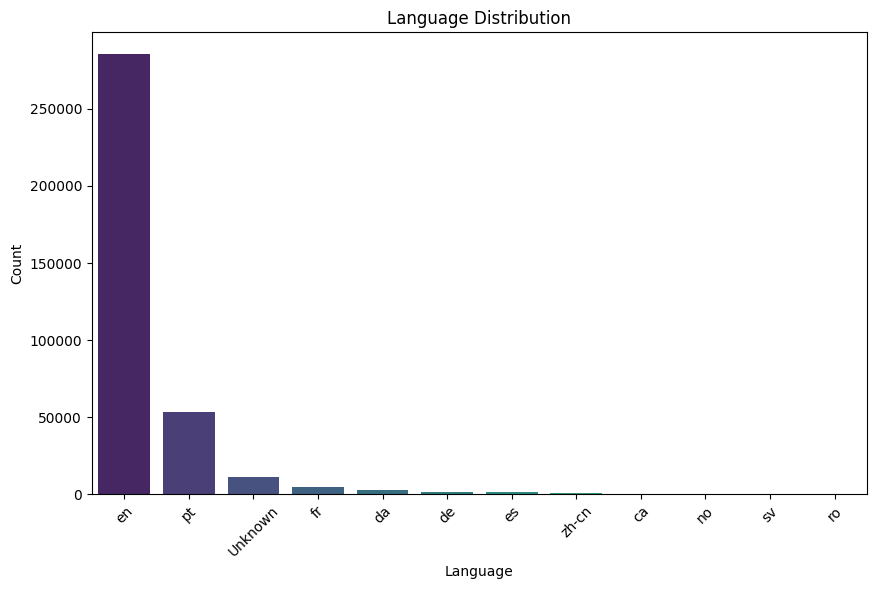

In [27]:
language_counts = train_merged["language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [28]:
train_merged["language"].unique()

array(['pt', 'en', 'es', 'fr', 'de', 'da', 'no', 'Unknown', 'sv', 'ca',
       'zh-cn', 'ro'], dtype=object)

**Languages Codes**

'en': English 'pt': Portuguese 'fr': French 'es': Spanish 'de': German 'da': Danish 'no': Norwegian 'sv': Swedish 'it': Italian 'ca': Catalan 'zh-cn': Chinese (Simplified) 'nl': Dutch

**Listed vs Unlisted**

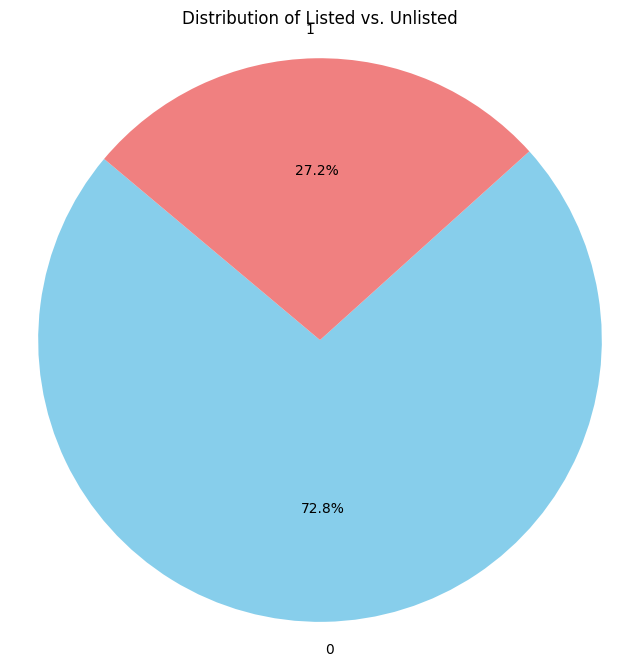

In [29]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

**Word count**

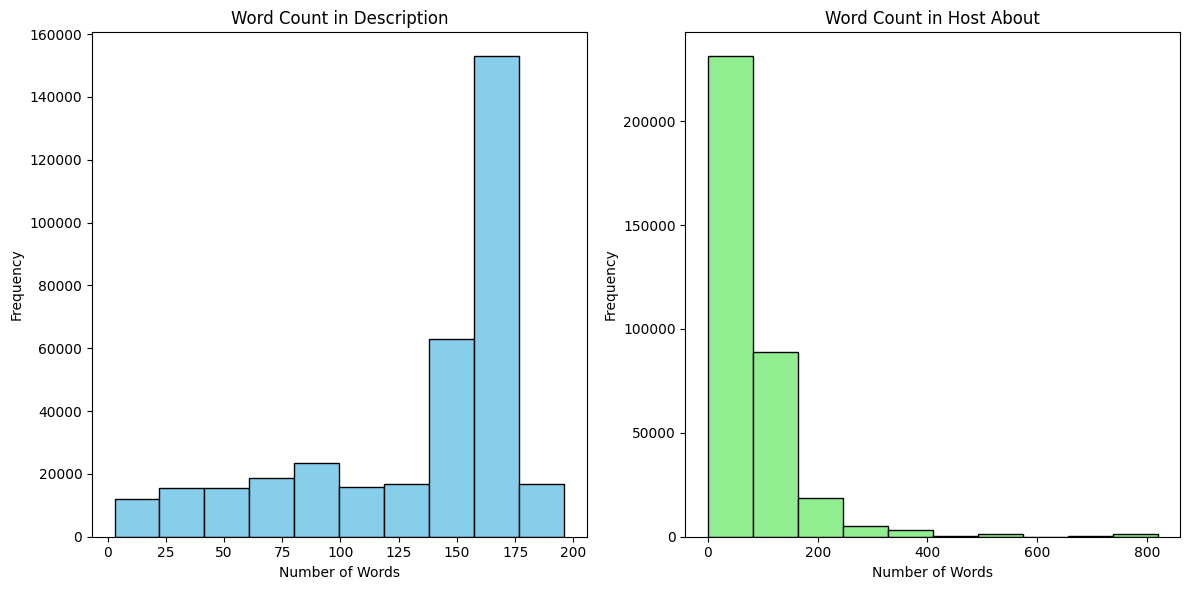

In [30]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_merged['description_word_count'] = train_merged['description'].apply(count_words)
train_merged['host_about_word_count'] = train_merged['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train_merged['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train_merged['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

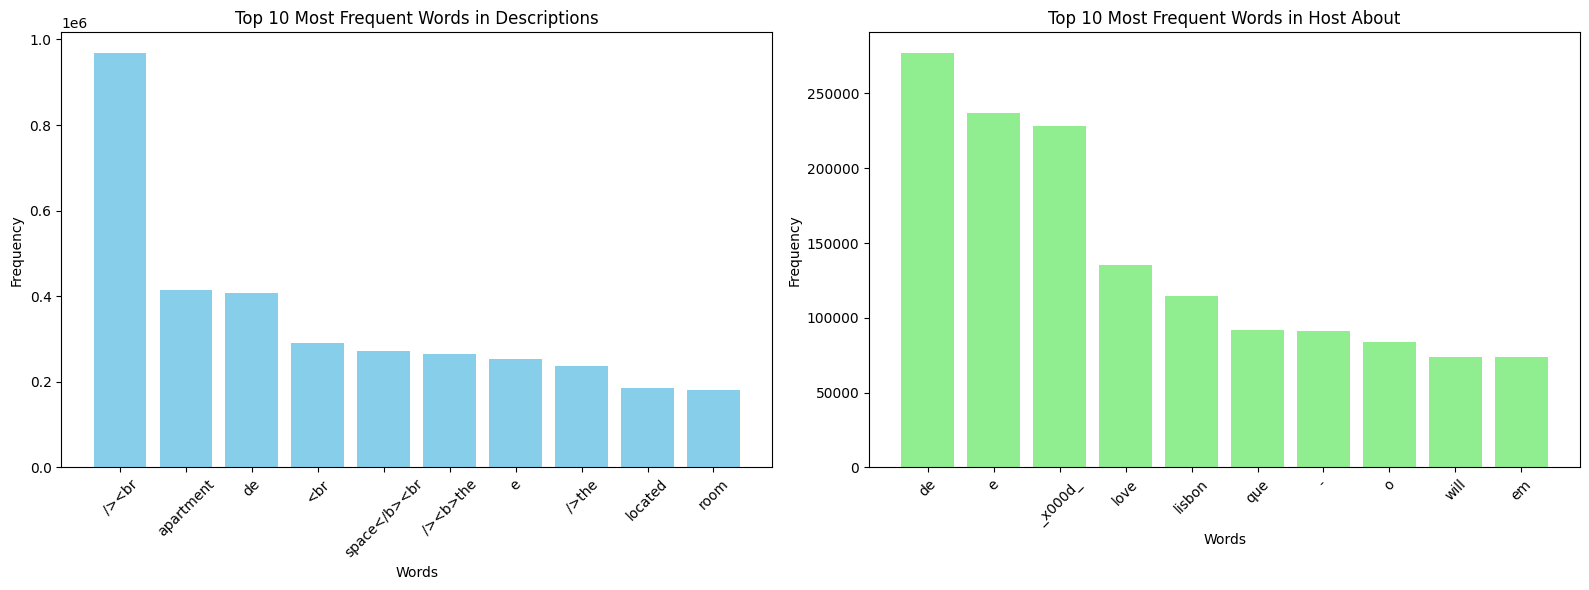

In [31]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]
    
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)
    
# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train_merged['description'])
top_words_host_about = count_word_frequencies(train_merged['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Host About')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


**Word Cloud**

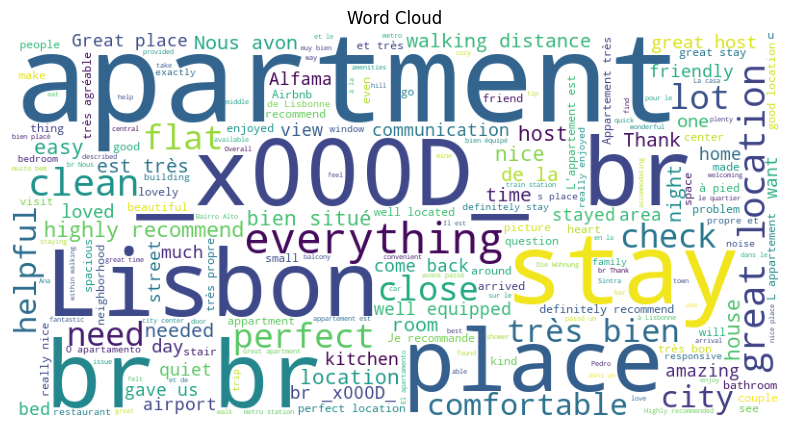

In [32]:
# Joining all the reviews into a single string
all_reviews = ' '.join(train_merged['comments'])
    
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud')
plt.show()


## 3. Pre-Process

### 3.2 Cleaning Data

In [ ]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

def clean_text(text, lemmatize=True, stemmer=True):
    # Lowercase text
    text = text.lower()
    
    # Remove unnecessary tags and all non-alphabetic characters
    text = re.sub("<br />", "", text)
    text = re.sub("[^a-zA-Z]"," ", text)
    
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop])
    
    # Lemmatize
    if lemmatize:
        text = " ".join(lemma.lemmatize(word) for word in text.split())
    
    # Stemming
    if stemmer:
        text = " ".join(stemmer.stem(word) for word in text.split())
        
    return text

# Apply cleaning function to each row of the 'comments' column
def clean_comments(df):
    tqdm.pandas()  # Enable progress_apply method
    df['clean_comments'] = df['comments'].progress_apply(lambda x: clean_text(x))
    return df

In [ ]:
train_merged_clean = clean_comments(train_merged)

In [ ]:
test_merged_clean = clean_comments(test_merged)

In [ ]:
train_merged_clean.head(5)

In [ ]:
test_merged_clean.head(5)

### Feature Engineering ?